### Importing Libraries:

In [17]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

### Loading Image Dataset and preprocessing the images:

In [2]:
Dataset="data"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['without_mask', 'with_mask']


In [3]:
images=[]
labels=[]
img_rows=112
img_cols=112
for category in Data_Dir:
    folder_path=os.path.join(Dataset,category)
    for img in os.listdir(folder_path):
        img_path=os.path.join(folder_path,img)
        img=cv2.imread(img_path)
        
        try:
            #converting image to grayscale
            grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            
            #resizing the gray scaled images into 112 x 112 to keep size of the image consistent
            resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
            images.append(resized_img)
            labels.append(category)
        except Exception as e:
            print('Exception: ',e)
            
images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows,img_cols,1))

### Label Binarizer and splitting Train/Test:

In [4]:
#Applying Label Binarizer to classify images as "With mask" and "Without Mask"
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
labels=np.array(labels)
(train_X,test_X,train_y,test_y)=train_test_split(images,labels,test_size=0.25,random_state=0)

In [5]:
num_classes=2
batch_size=32

### Basic Model : 2-layer Sequential Model:

In [6]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [7]:
from keras.optimizers import Adam

epoch=50
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics=['accuracy'])

In [8]:
fitted_model=model.fit(
train_X,
train_y,
epochs=epoch,
validation_split=0.25)

Epoch 1/50
133/133 [==============================] - 60s 447ms/step - loss: 0.7787 - accuracy: 0.5815 - val_loss: 0.5792 - val_accuracy: 0.6773
Epoch 2/50
133/133 [==============================] - 69s 520ms/step - loss: 0.5468 - accuracy: 0.7173 - val_loss: 0.4744 - val_accuracy: 0.8016
Epoch 3/50
133/133 [==============================] - 72s 544ms/step - loss: 0.4155 - accuracy: 0.8058 - val_loss: 0.3476 - val_accuracy: 0.8503
Epoch 4/50
133/133 [==============================] - 73s 546ms/step - loss: 0.2882 - accuracy: 0.8830 - val_loss: 0.3271 - val_accuracy: 0.8743
Epoch 5/50
133/133 [==============================] - 73s 550ms/step - loss: 0.2233 - accuracy: 0.9109 - val_loss: 0.3053 - val_accuracy: 0.8828
Epoch 6/50
133/133 [==============================] - 76s 572ms/step - loss: 0.1641 - accuracy: 0.9338 - val_loss: 0.3312 - val_accuracy: 0.8785
Epoch 7/50
133/133 [==============================] - 76s 573ms/step - loss: 0.1202 - accuracy: 0.9563 - val_loss: 0.3223 - val_ac

### Model - Using L2 Regularizer:

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activity_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activity_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))


model.add(Dense(num_classes,activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 110, 110, 32)      320       
_________________________________________________________________
activation_2 (Activation)    (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 53, 53, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 53, 53, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)      

In [10]:
from keras.optimizers import Adam

epoch=50
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics=['accuracy'])

In [11]:
fitted_model=model.fit(
train_X,
train_y,
epochs=epoch,
validation_split=0.25)

Epoch 1/50
133/133 [==============================] - 47s 349ms/step - loss: 2.9081 - accuracy: 0.5786 - val_loss: 0.5802 - val_accuracy: 0.8001
Epoch 2/50
133/133 [==============================] - 45s 341ms/step - loss: 0.5689 - accuracy: 0.7997 - val_loss: 0.5362 - val_accuracy: 0.8093
Epoch 3/50
133/133 [==============================] - 45s 342ms/step - loss: 0.4526 - accuracy: 0.8435 - val_loss: 0.3791 - val_accuracy: 0.8701
Epoch 4/50
133/133 [==============================] - 46s 343ms/step - loss: 0.3752 - accuracy: 0.8757 - val_loss: 0.3647 - val_accuracy: 0.8842
Epoch 5/50
133/133 [==============================] - 45s 340ms/step - loss: 0.3499 - accuracy: 0.8898 - val_loss: 0.3659 - val_accuracy: 0.8934
Epoch 6/50
133/133 [==============================] - 45s 339ms/step - loss: 0.3240 - accuracy: 0.9057 - val_loss: 0.3200 - val_accuracy: 0.9075
Epoch 7/50
133/133 [==============================] - 49s 366ms/step - loss: 0.2685 - accuracy: 0.9302 - val_loss: 0.3225 - val_ac

### Best Model - 3-Layer Sequential Model:

In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(256,activation='relu'))

model.add(Dense(num_classes,activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 110, 110, 32)      320       
_________________________________________________________________
activation_5 (Activation)    (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 53, 53, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 53, 53, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

In [13]:
from keras.optimizers import Adam

epoch=50
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics=['accuracy'])

In [14]:
fitted_model=model.fit(
train_X,
train_y,
epochs=epoch,
validation_split=0.25)

Epoch 1/50
133/133 [==============================] - 40s 295ms/step - loss: 0.7137 - accuracy: 0.5585 - val_loss: 0.5761 - val_accuracy: 0.7034
Epoch 2/50
133/133 [==============================] - 39s 296ms/step - loss: 0.5397 - accuracy: 0.7270 - val_loss: 0.3533 - val_accuracy: 0.8531
Epoch 3/50
133/133 [==============================] - 39s 291ms/step - loss: 0.3850 - accuracy: 0.8341 - val_loss: 0.3001 - val_accuracy: 0.8828
Epoch 4/50
133/133 [==============================] - 39s 290ms/step - loss: 0.3139 - accuracy: 0.8694 - val_loss: 0.2614 - val_accuracy: 0.8934
Epoch 5/50
133/133 [==============================] - 39s 292ms/step - loss: 0.2306 - accuracy: 0.9071 - val_loss: 0.2322 - val_accuracy: 0.9018
Epoch 6/50
133/133 [==============================] - 39s 294ms/step - loss: 0.1669 - accuracy: 0.9304 - val_loss: 0.2009 - val_accuracy: 0.9273
Epoch 7/50
133/133 [==============================] - 39s 294ms/step - loss: 0.1394 - accuracy: 0.9498 - val_loss: 0.2024 - val_ac

### Architecture Plot of Best Model showing different Layers:

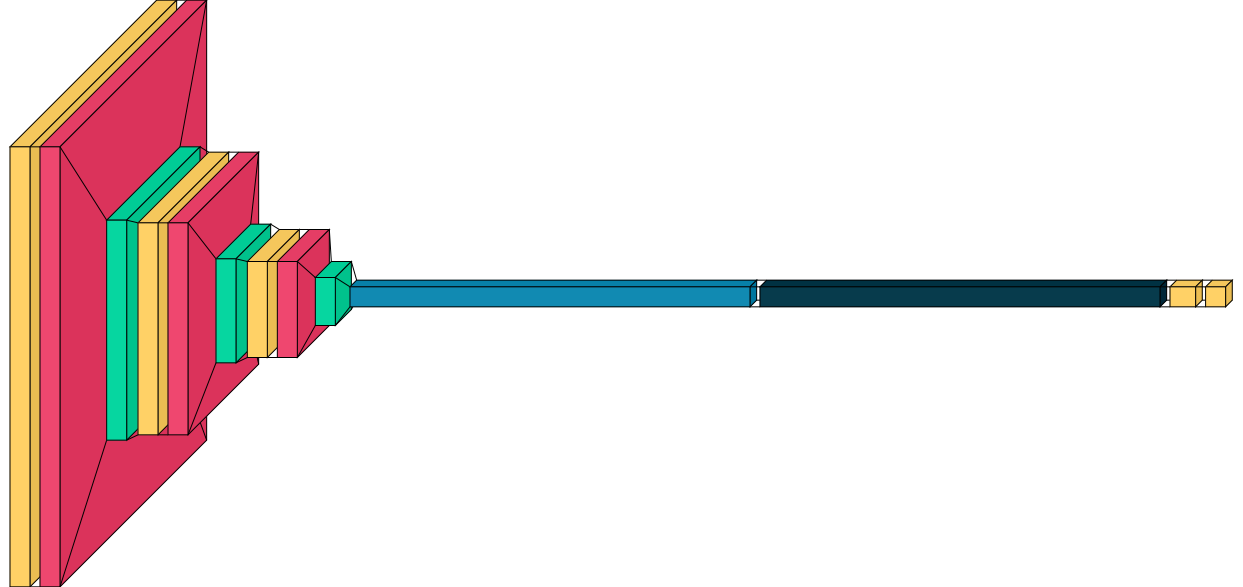

In [15]:
import visualkeras
visualkeras.layered_view(model).show() 
visualkeras.layered_view(model, to_file='output.png') 
visualkeras.layered_view(model, to_file='output.png').show()
visualkeras.layered_view(model)

### Visualizing the accuracy/loss plots for the best model:

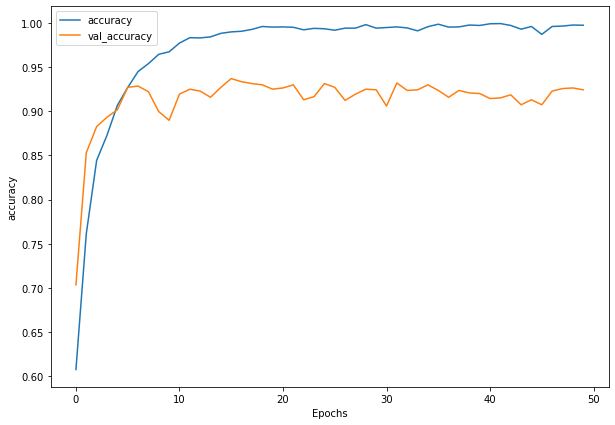

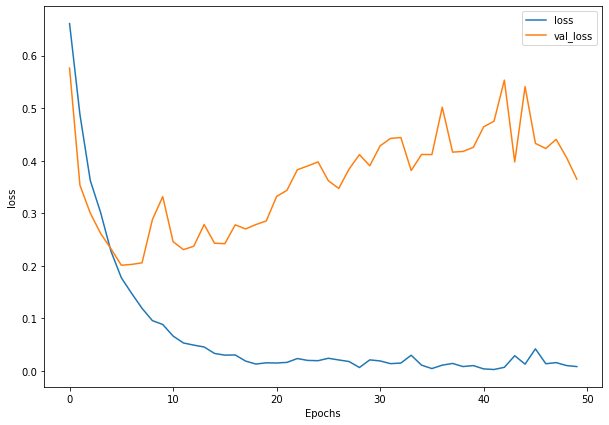

In [18]:
def plot_graph(fitted_model,string):
    plt.figure(figsize=(10,7))
    plt.plot(fitted_model.history[string],label=str(string))
    plt.plot(fitted_model.history["val_"+str(string)],label=str(string))
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,"val_"+string])
    plt.show()


plot_graph(fitted_model,"accuracy")
plot_graph(fitted_model,"loss")

### Predictions of few images:
Class 0 - with mask



Class 1 - without mask

In [19]:
#Prediction on a single image:

img = test_X[3]
test_img = img.reshape((1,112,112,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
c_name = ""
if (classname==0):
    c_name = "With Mask"
else:
    c_name = "Without Mask"
print("Class: ",c_name)

Class:  With Mask


E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


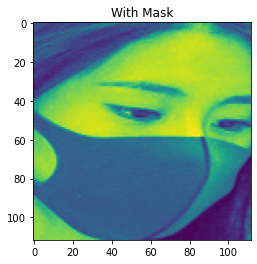

In [20]:
import matplotlib.pyplot as plt
img = img.reshape((112,112))
plt.imshow(img)
plt.title(c_name)
plt.show()

In [21]:
#Prediction on a single image:

img = test_X[1]
test_img = img.reshape((1,112,112,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
c_name = ""
if (classname==0):
    c_name = "With Mask"
else:
    c_name = "Without Mask"
print("Class: ",c_name)

Class:  Without Mask


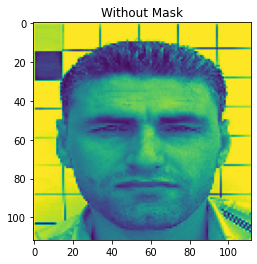

In [22]:
import matplotlib.pyplot as plt
img = img.reshape((112,112))
plt.imshow(img)
plt.title(c_name)
plt.show()

In [23]:
#Prediction on a single image:

img = test_X[100]
test_img = img.reshape((1,112,112,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
c_name = ""
if (classname==0):
    c_name = "With Mask"
else:
    c_name = "Without Mask"
print("Class: ",c_name)

Class:  Without Mask


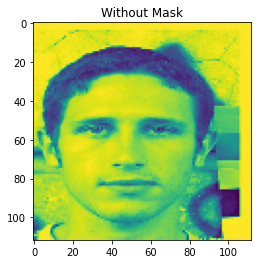

In [24]:
import matplotlib.pyplot as plt
img = img.reshape((112,112))
plt.imshow(img)
plt.title(c_name)
plt.show()

In [25]:
#Prediction on a single image:

img = test_X[200]
test_img = img.reshape((1,112,112,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
c_name = ""
if (classname==0):
    c_name = "With Mask"
else:
    c_name = "Without Mask"
print("Class: ",c_name)

Class:  Without Mask


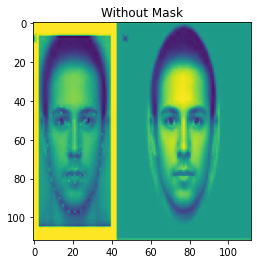

In [26]:
import matplotlib.pyplot as plt
img = img.reshape((112,112))
plt.imshow(img)
plt.title(c_name)
plt.show()

In [27]:
#Prediction on a single image:

img = test_X[1887]
test_img = img.reshape((1,112,112,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
c_name = ""
if (classname==0):
    c_name = "With Mask"
else:
    c_name = "Without Mask"
print("Class: ",c_name)

Class:  With Mask


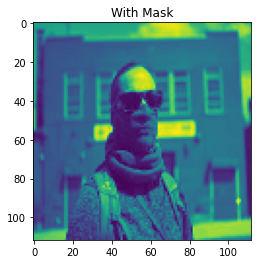

In [28]:
import matplotlib.pyplot as plt
img = img.reshape((112,112))
plt.imshow(img)
plt.title(c_name)
plt.show()

In [29]:
#Prediction on a single image:

img = test_X[1250]
test_img = img.reshape((1,112,112,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
c_name = ""
if (classname==0):
    c_name = "With Mask"
else:
    c_name = "Without Mask"
print("Class: ",c_name)

Class:  With Mask


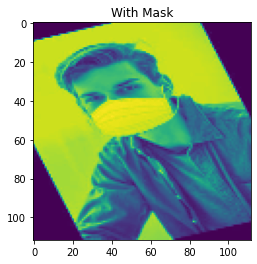

In [30]:
import matplotlib.pyplot as plt
img = img.reshape((112,112))
plt.imshow(img)
plt.title(c_name)
plt.show()

In [31]:
#Prediction on a single image:

img = test_X[260]
test_img = img.reshape((1,112,112,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
c_name = ""
if (classname==0):
    c_name = "With Mask"
else:
    c_name = "Without Mask"
print("Class: ",c_name)

Class:  Without Mask


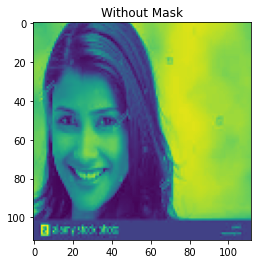

In [32]:
import matplotlib.pyplot as plt
img = img.reshape((112,112))
plt.imshow(img)
plt.title(c_name)
plt.show()

In [33]:
#Prediction on a single image:

img = test_X[450]
test_img = img.reshape((1,112,112,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
c_name = ""
if (classname==0):
    c_name = "With Mask"
else:
    c_name = "Without Mask"
print("Class: ",c_name)

Class:  With Mask


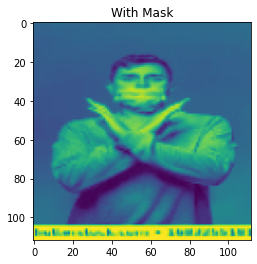

In [34]:
import matplotlib.pyplot as plt
img = img.reshape((112,112))
plt.imshow(img)
plt.title(c_name)
plt.show()

In [35]:
#Prediction on a single image:

img = test_X[1050]
test_img = img.reshape((1,112,112,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
c_name = ""
if (classname==0):
    c_name = "With Mask"
else:
    c_name = "Without Mask"
print("Class: ",c_name)

Class:  Without Mask


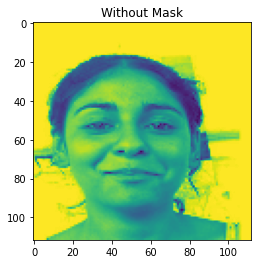

In [36]:
import matplotlib.pyplot as plt
img = img.reshape((112,112))
plt.imshow(img)
plt.title(c_name)
plt.show()

In [37]:
#Prediction on a single image:

img = test_X[1650]
test_img = img.reshape((1,112,112,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
c_name = ""
if (classname==0):
    c_name = "With Mask"
else:
    c_name = "Without Mask"
print("Class: ",c_name)

Class:  Without Mask


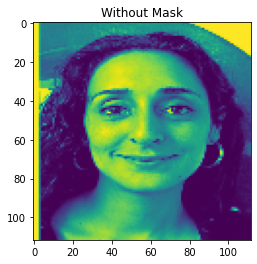

In [38]:
import matplotlib.pyplot as plt
img = img.reshape((112,112))
plt.imshow(img)
plt.title(c_name)
plt.show()